In [1]:
import pandas as pd
import re
import demoji
import jaconv
from nltk.corpus import words
import nltk
from xml.sax.saxutils import unescape

# Download the dictionary by uncommenting the following line only the first time it is run
# nltk.download('words')

# Get a list of English words from nltk
english_words = set(words.words())

# Regular expression patterns for detecting URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

def confirm_URL(df, url_pattern):
    # Checks each line of text for URLs and deletes lines that contain them
    df = df[~df['post'].str.contains(url_pattern, na=False)]

    return df

def convert_to_halfwidth(text):
    return jaconv.z2h(text, kana=False, ascii=True, digit=True)

def replace_words(df, column, replacements):
    """
    Replaces a word in the text of the specified column of the data frame

    :param df: Data Frame
    :param column: Name of column containing text
    :param replacements: Dictionary of words to be replaced (keys are before replacement, values are after replacement)
    """
    df[column] = df[column].apply(lambda x: ' '.join([replacements.get(word, word) for word in x.split()]))
    return df

def text_conversion(text):
    """
    Converting text to complex

    :param text: text
    """

    # Decode encoded strings using unescape
    text = unescape(text)

    # Delete pictograms
    text = demoji.replace(string=text, repl='')

    # Convert to half-width characters
    text = convert_to_halfwidth(text)

    # Delete hashtags
    text = text.replace(';', '; ')
    text = re.sub(r'#.*', "", text)

    # Various symbol processing
    text = re.sub(r'\！', '!', text)
    text = re.sub(r'\!+', '.', text)

    text = re.sub(r'\？', '?', text)
    text = re.sub(r'\‽', '?', text)
    text = re.sub(r'\?+', '.', text)

    text = re.sub(r'\．', '.', text)
    text = re.sub(r'\.+', '.', text)

    text = re.sub(r'\，', ',', text)
    text = re.sub(r'\,+', ',', text)

    text = re.sub(r'\【', '[', text)
    text = re.sub(r'\「', '[', text)
    text = re.sub(r'\[+', '', text)

    text = re.sub(r'\】', ']', text)
    text = re.sub(r'\」', ']', text)
    text = re.sub(r'\]+', '', text)

    text = re.sub(r'\）', ')', text)
    text = re.sub(r'\)+', '', text)

    text = re.sub(r'\（', '(', text)
    text = re.sub(r'\(+', '', text)

    text = re.sub(r'\＿', '_', text)
    text = re.sub(r'\_+', ' ', text)

    # Delete URLs
    text = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#]+)", "" ,text)
    text = text.replace('…', '').replace('²', '').replace('*', '').replace('%', 'percent').replace('; -;', '').replace('.,', '.').replace('. ,', '.').replace(' .', '.')
    text = text.replace('xa0,', '').replace('xa0', '').replace('amp;', '').replace('&', 'and').replace('@', 'at').replace('=', 'is').replace('+', '')
    text = text.replace('percent', ' percent').replace('yo', ' yo')
    # text = text.replace('Removed', '').replace('Removed,', '').replace('Removed.', '')

    # Add spaces after “.” or “,” if there are no spaces
    text = text.replace('.', '. ').replace(',', ', ')
    
    # Remove white space at the beginning and end of sentences
    text = text.strip()
    
    # Replace consecutive spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    text = text.replace('"', '').replace("'", '').replace(":", '').replace("Id", 'I would')

    text = text.lower()

    # Newline code deletion
    text = text.replace('\n', '').replace('\r', '').replace('\t', '').replace('\\n', '').replace('\\r', '').replace('\\t', '').replace('\\', '')

    return text

def capitalize_i(text):
    # Replace single 'i' with 'I'
    text = re.sub(r'\bi\b', 'I', text)
    # Replace 'i' in 'i'm' and 'i'll' with 'I'
    text = re.sub(r"\bi'", "I'", text)

    return text

def capitalize_sentences_initial(text):
    """
    Capitalize the first letter of each sentence.

    :param text: sentence
    :return: String with the first letter of each sentence capitalized
    """
    sentences = re.split(r'(?<=[.!?]) +', text)
    sentences = [s.capitalize() for s in sentences]
    return ' '.join(sentences)

# Dictionary of words to be replaced
replacements = {
    "im": "I am",
    "iam": "I am",
    "i'm": "I am",
    "Im": "I am",
    "I'm": "I am",
    "Ive": "I have",
    "I'd": "I would",
    "ive": "I have",
    "i'd": "I would",
    "tbh": "to be honest",
    "kinda": "kind of",
    "cuz": "because",
    "geez": "jesus christ",
    "ill": "i'll",
    "Id": "i'd",
    "didnt": "didn't",
    "dont": "don't",
    "doesnt": "doesn't",
    "cant": "can't",
    "isnt": "isn't",
    "arent": "aren't",
    "wasnt": "wasn't",
    "werent": "weren't",
    "havent": "haven't",
    "hasnt": "hasn't",
    "hadnt": "hadn't",
    "wont": "won't",
    "wouldnt": "wouldn't",
    "shouldnt": "shouldn't",
    "couldnt": "couldn't",
    "mustnt": "mustn't",
    "shes": "she's",
    "hes": "he's",
    "its": "it's",
    "thats": "that's",
    "theres": "there's",
    "heres": "here's",
    "whos": "who's",
    "whats": "what's",
    "whys": "why's",
    "hows": "how's",
    "lets": "let's",
    "id've": "i'd have",
    "could've": "could have",
    "would've": "would have",
    "should've": "should have",
    "we're": "we are",
    "they're": "they are",
    "i'll": "I will",
    "you're": "you are",
    "it's": "it is",
    "idk": "I do not know",
    "we’re": "we are",
    "they’re": "they are",
    "i’ll": "I will",
    "you’re": "you are",
    "it’s": "it is",
    "id’ve": "i'd have",
    "could’ve": "could have",
    "would’ve": "would have",
    "should’ve": "should have",
    "kms": "kill myself",
    "laxy": "lazy",
    "fr": "for real",
    "dont": "do not",
    "plz": "please",
    "irl": "in real life",
    "meim": "maim",
    "imma": "I am going to",
    "ffs": "offs",
    "theyre": "they are",
    "dunno": "do not know",
    "ofc": "of course",
    "wouldk": "would",
    "cantdo": "can not do",
    "tw": "two",
    "harmi": "harm, i",
    "retardi": "retard i",
    "fem": "females",
    "dont": "do not",
    "coz": "because",
    "sch": "school",
    "u": "you",
    "bf": "boyfriend",
    "boy friend": "boyfriend",
    "girl friend": "girlfriend",
    "em": "them",
    "nobodyll": "nobody will",
    "h it": "hit",
    "schoo": "school",
    "xcuse me": "excuse me",
    "wasnt": "was not",
    "tgere": "there",
    "don": "do not",
    "didn": "did not",
    "4kdjejdne sjdjd fuckdjejekieirieiriodidieiridodiodididodidookdkekekdkoeooeoi": "i",
    "yt": "yet",
    "scaared": "scared",
    "fwiled": "failed",
    "wxpecter": "expected",
    "snd": "and",
    "oiving": "living",
    "awwy": "away",
    "cwre": "care",
    "ijust": "i just",
    "ppease": "please",
    "juet": "just",
    "ijust": "i just",
    "wwnt": "want",
    "tefuse": "refuse",
    "tovkill": "to kill",
}

# Dictionary of words to be replaced
detailed_replacements = {
    "i’m": "I am",
    "i'm": "I am",
    "i've": "I have",
    "i'll": "I will",
    "i'd": "I would",
    "didn't": "did not",
    "don't": "do not",
    "doesn't": "does not",
    "can't": "can not",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "couldn't": "could not",
    "mustn't": "must not",
    "she's": "she is",
    "he's": "he is",
    "it's": "it is",
    "that's": "that is",
    "there's": "there is",
    "here's": "here is",
    "who's": "who is",
    "what's": "what is",
    "why's": "why is",
    "how's": "how is",
    "let's": "let us",
    "i'd have": "I would have",
    "could've": "could have",
    "would've": "would have",
    "should've": "should have",
    "we're": "we are",
    "they're": "they are",
    "i'll": "I will",
    "you're": "you are",
    "it's": "it is",

    # Version ’ instead of '
    "i’ve": "I have",
    "i’ll": "I will",
    "i’d": "I would",
    "didn’t": "did not",
    "don’t": "do not",
    "doesn’t": "does not",
    "can’t": "can not",
    "isn’t": "is not",
    "aren’t": "are not",
    "wasn’t": "was not",
    "weren’t": "were not",
    "haven’t": "have not",
    "hasn’t": "has not",
    "hadn’t": "had not",
    "won’t": "will not",
    "wouldn’t": "would not",
    "shouldn’t": "should not",
    "couldn’t": "could not",
    "mustn’t": "must not",
    "she’s": "she is",
    "he’s": "he is",
    "it’s": "it is",
    "that’s": "that is",
    "there’s": "there is",
    "here’s": "here is",
    "who’s": "who is",
    "what’s": "what is",
    "why’s": "why is",
    "how’s": "how is",
    "let's": "let us",
    "i’d have": "I would have",
    "could’ve": "could have",
    "would’ve": "would have",
    "should’ve": "should have",
    "we’re": "we are",
    "they’re": "they are",
    "i’ll": "I will",
    "you’re": "you are",
    "it’s": "it is",
    "covid19": "covid-19",
    "covid 19": "covid-19",
    "Covid 19": "covid-19",
    "Covid19": "covid-19",
    "schizoaffective": "schizo-affective",
    "schizo affective": "schizo-affective",
    "thatll": "that will",
    "ibs-d": "Ibs-d",
    "ibsd": "Ibs-d",
    "ibs d": "Ibs-d",
    "Ibs d": "Ibs-d",
    "Ibs-d": "Ibs-d",
    "B-day": "birthday",
    "b-day": "birthday",
}

# Dictionary of words to be replaced (slang words)
slang_dict = {
    "brb": "be right back",
    "dms": "direct messages",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "idk": "i don't know",
    "btw": "by the way",
    "bff": "best friends forever",
    "tbh": "to be honest",
    "imo": "in my opinion",
    "fyi": "for your information",
    "irl": "in real life",
    "yolo": "you only live once",
    "rofl": "rolling on the floor laughing",
    "smh": "shaking my head",
    "nvm": "never mind",
    "gtg": "got to go",
    "ily": "i love you",
    "jk": "just kidding",
    "tmi": "too much information",
    "fomo": "fear of missing out",
    "lmao": "laughing my ass off",
    "ttyl": "talk to you later",
    "icymi": "in case you missed it",
    "rn": "right now",
    "soml": "story of my life",
    "afk": "away from keyboard",
    "bae": "before anyone else",
    "cya": "see you",
    "diy": "do it yourself",
    "ftw": "for the win",
    "gg": "good game",
    "idc": "i don't care",
    "ilysm": "i love you so much",
    "jkl": "just kidding lol",
    "lmk": "let me know",
    "nbd": "no big deal",
    "nm": "not much",
    "nsfw": "not safe for work",
    "omw": "on my way",
    "ppl": "people",
    "tba": "to be announced",
    "tl;dr": "too long; didn't read",
    "wtf": "what the fuck",
    "wyd": "what you doing",
    "sus": "suspicious",
    "vibe": "feeling/atmosphere",
    "stan": "obsessive fan",
    "goat": "greatest of all time",
    "snacc": "attractive person",
    "lit": "exciting or amazing",
    "flex": "show off",
    "noob": "newbie",
    "savage": "bold or unapologetic",
    "mood": "current feeling",
    "clapback": "witty response",
    "thirsty": "desperate",
    "bop": "good song",
    "fam": "family or friends",
    "ship": "relationship",
    "big yikes": "major embarrassment",
    "cap": "lie",
    "no cap": "no lie",
    "bet": "sure or okay",
    "drip": "stylish",
    "cheugy": "outdated or uncool",
    "fit": "outfit",
    "go off": "express yourself",
    "heat": "high-quality content",
    "hundo p": "100 percent",
    "iykyk": "if you know, you know",
    "jomo": "joy of missing out",
    "l": "loss or failure",
    "simp": "overly attentive person",
    "snap": "snapchat",
    "slaps": "hits hard (good song)",
    "troll": "provoke online",
    "v": "very",
    "w": "win",
    "yeet": "throw/awesome",
    "lmao": "laughing my ass/arse off",
    "yo": "years old",
    "ya": "you",
}

# Dictionary of words to be replaced (slang words)
negative_slang_dict = {
    "kms": "kill myself",
    "kys": "kill yourself",
    "s/i": "self-injury",
    "c/t": "cutting",
    "od": "overdose",
    "ed": "eating disorder",
    "anx": "anxiety",
    "depr": "depression",
    "su": "suicidal",
    "bpd": "borderline personality disorder",
    "ts": "triggering",
    # "sad": "sadness",
    # "loner": "someone who feels isolated or alone",
    # "breakdown": "mental or emotional collapse",
    # "blackout": "loss of memory or consciousness",
    # "panic": "panic attack",
    # "meltdown": "emotional or mental breakdown",
    # "overthinking": "thinking too much about something",
    # "worthless": "feeling without value",
    # "hopeless": "feeling without hope",
    # "burnout": "extreme stress or exhaustion",
    # "self-loathing": "intense dislike of oneself",
    # "isolation": "feeling isolated or cut off from others",
    # "ghosted": "suddenly cut off communication",
    # "pain": "emotional or physical suffering",
    # "stress": "mental or emotional strain",
    # "crying": "shedding tears due to emotional pain",
    # "hurt": "feeling emotional or physical pain",
    # "miserable": "very unhappy or uncomfortable",
    # "broken": "feeling deeply hurt or defeated",
    # "trauma": "emotional response to a terrible event",
    # "regret": "feeling of sadness over past actions",
    # "grief": "deep sorrow, especially caused by death",
    # "shame": "feeling of guilt or disgrace",
    # "guilt": "feeling responsible for a wrongdoing"
}


URL_replacements = {
    "https://www.reddit.com/r/SuicideWatch/comments/jkf5bw/why_my_boyfriend_would_suggest_this_if_he_loves_me/": "Why my boyfriend would suggest this if he loves me.",
    "https://www.reddit.com/r/depression/comments/6izgy2/i_feel_hopeless_and_want_to_die/": "I Feel hopeless and want to die.",
    "https://www.reddit.com/r/AskReddit/comments/n1vroe/serious\\_redditors\\_who\\_have\\_lost\\_someone\\_to/](https://www.reddit.com/r/AskReddit/comments/n1vroe/serious_redditors_who_have_lost_someone_to/))": "[Serious] Redditors who have lost someone to suicide, what was it like?",
    "https://imgur.com/a/EqLEah7": "Recent therapy notes. I have since quit my job and haven’t left my apartment in three days.",
    "https://www.reddit.com/r/SuicideWatch/comments/jhy5yh/please_read_i_am_sad_not_suicidal_but_still/": "Please read. I am sad not suicidal but still..",
    "https://www.reddit.com/r/relationship_advice/comments/jcumcc/i_need_his_affection_and_love_but_i_dont_know_how/": "I need his affection and love but I don't know how to Express it right now...please read",
    "https://www.reddit.com/r/SuicideWatch/comments/kfpjrv/what_are_the_conditions_for_not_feeling_finegood/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf": "What are the conditions for not feeling fine/good about death?",
    "https://www.reddit.com/r/SuicideWatch/comments/knffgq/accidental_unknowing_rapist_and_i_cant_live_with/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf)": '"accidental, unknowing rapist" and i cant live with myself.',
    "https://www.reddit.com/r/SuicideWatch/comments/jja9xt/i_cant_decide_if_i_want_to_wait_until_the_us/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf": "i cant decide if i want to wait until the US election results, or if i should just do it now because either way everything that is already shit is only going to get shittier",
}

# Function to replace nonsensically consecutive characters
def normalize_text(text):
    # Replace multiple consecutive parts of the same word
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    
    # Replace multiple repeated combinations of the same word
    text = re.sub(r'\b(\w+ \w+)( \1)+\b', r'\1', text)
    
    # Replace words that contain the same character three or more times in a row
    return re.sub(r'(.)\1{2,}', r'\1', text)

def drop_none_text(df):
    df['length'] = df['post'].apply(len)
    df = df[df['length']!=0]
    df = df.drop(columns='length')
    return df

def is_meaningful_word(word):
    # Check if the word exists in the dictionary of English words.
    return word.lower() in english_words

def extract_meaningful_text(text):
    # Regular expressions split sentences
    sentences = re.split(r'\. |\? |\! ', text)
    meaningful_sentences = []
    
    for sentence in sentences:
        words_in_sentence = sentence.split()
        if all(is_meaningful_word(word) or word.isdigit() for word in words_in_sentence):
            meaningful_sentences.append(sentence)
    
    return '. '.join(meaningful_sentences)

def extract_only_number_text(text):
    text = text.replace('wouldk', 'would').replace('.,', '.').replace('. ,', '.').replace(' .', '.').replace('h it', 'hit')
    text = text.replace('xcuse me', 'excuse me').replace('wer elearning', 'we are learning').replace('gonan', 'gonna').replace('nught', 'night').replace('hi mto', 'him to')
    text = text.replace('wasnt', 'was not').replace('wouldve', 'would have').replace('Https/imgur. Com/a/t3wtiov', '').replace('didnt', 'did not').replace('youve', 'you have')
    text = text.replace('4kdjejdne sjdjd fuckdjejekieirieiriodidieiridodiodididodidookdkekekdkoeooeoi', 'I').replace('Soi nherently unlikeable.', 'So I am inherently unlikeable.')
    text = text.replace('couldve', 'could have').replace('allcmy xanax and effexo', 'all my xanax and effexor')
    text = text.replace('Hope my mom callsme selfieh whem shensees my dewdnbody I am the morjimg.', 'Hope my mom calls me selfish when she sees my dead body in the morning.')
    text = text.replace('scaared', 'scared').replace('fwiled', 'failed').replace('wxpecter', 'expected').replace('snd', 'and').replace('oiving', 'living')
    text = text.replace('awwy', 'away').replace('cwre', 'care').replace('ijust', 'I just').replace('Ppease', 'Please').replace('juet', 'just')
    text = text.replace('wwnt', 'want').replace('tefuse', 'refuse').replace('tovkill', 'to kill').replace('callsme', 'calls me').replace('shensees', 'she sees')
    text = text.replace('I just turned 17 band', 'I just turned 17 and')
    text = text.replace('callckyself', 'call myself').replace('sngry', 'angry').replace('tlaking', 'talking')
    text = text.replace('howckuch', 'how much').replace('hebstarted', 'he started').replace('talkikgnsbout', 'talking about')
    text = text.replace('hownimnalmost', 'how I am almost').replace('almpdt', 'almost').replace('accountnto', 'account to')
    text = text.replace('mynfriend', 'my friend').replace('killijgnmyself', 'killing myself').replace('willcbe', 'will be')
    text = text.replace('awrulclife', 'awful life').replace('willcbe', 'will be').replace('youre', 'you are')
    text = text.replace('6 mo on', '6 months on').replace('knw', 'know').replace('an yone', 'anyone').replace('wont', 'will not').replace('dont', 'do not').replace('ever yones', 'everyones')
    text = text.replace('ever yone', 'everyone').replace('overdosibg', 'overdosing').replace('temme', 'tell me')
    
    # Regular expressions remove meaningless strings and extract meaningful sentences
    sentences = re.split(r'\. |\? |\! ', text)
    meaningful_sentences = [sentence for sentence in sentences if re.search(r'[a-zA-Z]', sentence)]
    return '. '.join(meaningful_sentences)
    
def preprosessing_text(df, url_pattern):

    # Replacing URLs
    # df = replace_words(df, 'post', URL_replacements)

    # Delete lines containing URLs
    df = confirm_URL(df, url_pattern)

    # Correcting meaningless consecutive words
    df['post'] = df['post'].apply(normalize_text)
    
    # Text Processing
    df['post'] = df['post'].apply(text_conversion)

    # Perform replacements
    df = replace_words(df, 'post', replacements)
    df = replace_words(df, 'post', detailed_replacements)
    df = replace_words(df, 'post', slang_dict)
    df = replace_words(df, 'post', negative_slang_dict)

    # Capitalize the first letter of each sentence
    df['post'] = df['post'].apply(capitalize_sentences_initial)
    df['post'] = df['post'].apply(capitalize_i)

    df = drop_none_text(df)

    # Remove unintelligible words
    # df['post'] = df['post'].apply(extract_meaningful_text)

    # Delete sentences with only numbers
    df['post'] = df['post'].apply(extract_only_number_text)

    return df

def text_sort(df):
    # Sort by length of sentences in POST column
    df['length'] = df['post'].apply(len)
    df = df[df['length']!=0]
    df = df.sort_values(by='length').reset_index(drop=True)
    df = df.drop(columns='length')

    return df

In [2]:
def simple_capitalize_text(text):
    text = text.lower()
    # Remove white space at the beginning and end of sentences
    text = text.strip()
    
    # Replace consecutive spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    text = text.replace('\n', '').replace('\r', '').replace('\t', '').replace('\\n', '').replace('\\r', '').replace('\\t', '').replace('\\', '')
    text = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#]+)", "" ,text)
    text = text.replace('\n', '').replace('\r', '').replace('\t', '').replace('\\n', '').replace('\\r', '').replace('\\t', '').replace('\\', '')
    return text

def simple_fix_text(df, url_pattern):
    df = confirm_URL(df, url_pattern)
    df['post'] = df['post'].apply(simple_capitalize_text)
    return df

In [33]:
import torch
import torch.nn as nn
from transformers.trainer_utils import set_seed
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from pprint import pprint
from datasets import Dataset
from typing import Union
from transformers import BatchEncoding, EarlyStoppingCallback
from collections import Counter
import os
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import random

def set_random_seed(seed: int = 42):
    set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
    # 再現性を保つための設定
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # print("乱数シード設定完了")

set_random_seed(42)

## set custom loss ##

## Label Smoothing
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, num_classes: int = 4):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
        self.num_classes = num_classes

    def forward(self, pred, target):
        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        loss = (-true_dist * log_softmax_pred).sum(dim=1)
        return loss.mean()

## Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha: float = 1.0, gamma: float = 2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, pred, target):
        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        return focal_loss.gather(1, target.unsqueeze(1)).mean()


## Class Balanced Loss
class ClassBalancedLoss(nn.Module):
    def __init__(self, beta: float = 0.999, num_classes: int = 4, samples_per_class: list = None):
        super(ClassBalancedLoss, self).__init__()
        self.beta = beta
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class

        if samples_per_class is not None:
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        device = pred.device
        self.weights = self.weights.to(device)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        loss = -log_softmax_pred.gather(1, target.unsqueeze(1))
        loss = loss * self.weights[target].unsqueeze(1)
        return loss.mean()

## Label Smoothing×Focal Loss
class LabelSmoothingFocalLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, alpha: float = 1.0, gamma: float = 2.0, num_classes: int = 4):
        super(LabelSmoothingFocalLoss, self).__init__()
        self.smoothing = smoothing
        self.alpha = alpha
        self.gamma = gamma
        self.num_classes = num_classes

    def forward(self, pred, target):
        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        loss = (focal_loss * true_dist).sum(dim=1)
        return loss.mean()


## Label Smoothing×Class Balanced Loss
class LabelSmoothingClassBalancedLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, beta: float = 0.999, num_classes: int = 4, samples_per_class: list = None):
        super(LabelSmoothingClassBalancedLoss, self).__init__()
        self.smoothing = smoothing
        self.beta = beta
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class

        if samples_per_class is not None:
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)
        
        log_softmax_pred = torch.log_softmax(pred, dim=1)
        loss = (-true_dist * log_softmax_pred).sum(dim=1)
        loss = loss * self.weights[target].unsqueeze(1)
        return loss.mean()


## Focal Loss×Class Balanced Loss
class FocalClassBalancedLoss(nn.Module):
    def __init__(self, alpha: float = 1.0, beta: float = 0.999, gamma: float = 2.0, num_classes: int = 4, samples_per_class: list = None):
        super(FocalClassBalancedLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class

        if samples_per_class is not None:
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        device = pred.device
        self.weights = self.weights.to(device)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        loss = focal_loss.gather(1, target.unsqueeze(1))
        loss = loss * self.weights[target].unsqueeze(1)
        return loss.mean()


## ラベルスムージング、Focal Loss、Class Balanced Lossの組み合わせ
class LabelSmoothingFocalClassBalancedLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, alpha: float = 1.0, beta: float = 0.999, gamma: float = 2.0, num_classes: int = 4, samples_per_class: list = None):
        super(LabelSmoothingFocalClassBalancedLoss, self).__init__()
        self.smoothing = smoothing
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class
        
        if samples_per_class is not None:
            # calculate weight of ClassBalancedLoss
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        # predと同じデバイスにweightsを移動
        device = pred.device
        self.weights = self.weights.to(device)

        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)

        # log_softmax_predはFocal Lossのlog(p_mi)を示す
        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        # smoothing * focal loss
        loss = (focal_loss * true_dist).sum(dim=1)
        # loss * class balanced loss
        final_loss = loss * self.weights[target].unsqueeze(1)
        
        return torch.mean(final_loss)

# カスタムTrainerクラスの定義
class CustomTrainer(Trainer):
    def __init__(self, *args, criterion=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.criterion = criterion

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # Forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # Compute custom loss
        loss = self.criterion(logits, labels)
        return (loss, outputs) if return_outputs else loss

def report_memory():
    print(f"Allocated: {torch.cuda.memory_allocated() / 1024 ** 2:.2f} MiB")
    print(f"Cached: {torch.cuda.memory_reserved() / 1024 ** 2:.2f} MiB")

def cleanup_gpu_memory():
    """
    GPUキャッシュを空にし、CUDAメモリをリセットし、メモリ使用状況を表示する関数。
    """
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.reset_accumulated_memory_stats()

    print("After cleanup:")
    report_memory()

# def load_data(train_path: str, valid_path: str):
def load_data(original_train_df, valid_df):
    train_dataset = Dataset.from_pandas(original_train_df)
    valid_dataset = Dataset.from_pandas(valid_df)

    pprint(train_dataset[0])
    return train_dataset, valid_dataset

def tokenize_data(train_dataset, valid_dataset, model_name: str):
    set_random_seed(42)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    print(type(tokenizer).__name__)

    tokens = tokenizer.tokenize(train_dataset[0]['post'])
    print(tokens)

    def preprocess_text_classification(example: dict[str, Union[str, int]]) -> BatchEncoding:
        # トークナイザーの最大シーケンス長を取得
        max_length = tokenizer.model_max_length
        try:
            encoded_example = tokenizer(example["post"], max_length=max_length, truncation=True, padding='longest')
            encoded_example["labels"] = example["post_risk"]
            return encoded_example
        except Exception as e:
            print(f"Error processing example: {example}")
            print(f"Error message: {e}")
            raise e

    try:
        encoded_train_dataset = train_dataset.map(preprocess_text_classification, remove_columns=train_dataset.column_names)
        encoded_valid_dataset = valid_dataset.map(preprocess_text_classification, remove_columns=valid_dataset.column_names)
    except Exception as e:
        print(f"Error during dataset mapping: {e}")
        raise e
    # encoded_test_dataset = test_dataset.map(preprocess_text_classification, remove_columns=valid_dataset.column_names)
    print(encoded_train_dataset[0])
    return encoded_train_dataset, encoded_valid_dataset, tokenizer

def prepare_model(model_name: str, num_labels: int):
    set_random_seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = (AutoModelForSequenceClassification
             .from_pretrained(model_name, num_labels=num_labels)
             .to(device))
    return model

def prepare_trainer(model, encoded_train_dataset, encoded_valid_dataset, tokenizer, epoch, samples_per_class, num_labels, criterion_name, output_dir: str):
    set_random_seed(42)
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    training_args = TrainingArguments(
        output_dir=output_dir,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        learning_rate=2e-5,
        lr_scheduler_type="linear",
        warmup_ratio=0.1,
        num_train_epochs=epoch,
        save_strategy="epoch", # エポックごとに保存
        save_total_limit=1, # 最新の1つだけを保存
        logging_strategy="epoch", # エポックごとにログ保存
        evaluation_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1_weighted",
        fp16=True,
        seed=42,
    )

    def compute_metrics(eval_pred):
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)
        accuracy = accuracy_score(labels, predictions)
        precision_weighted = precision_score(labels, predictions, average='weighted')
        recall_weighted = recall_score(labels, predictions, average='weighted')
        f1_weighted = f1_score(labels, predictions, average='weighted')
        precision_macro = precision_score(labels, predictions, average='macro')
        recall_macro = recall_score(labels, predictions, average='macro')
        f1_macro = f1_score(labels, predictions, average='macro')
        return {"accuracy": accuracy, "precision_macro": precision_macro, "recall_macro": recall_macro, "f1_macro": f1_macro, "precision_weighted": precision_weighted, "recall_weighted": recall_weighted, "f1_weighted": f1_weighted}
    
    if criterion_name == 'LabelSmoothing':
        criterion = LabelSmoothing(smoothing=0.1, num_classes=num_labels)
    elif criterion_name == 'FocalLoss':
        criterion = FocalLoss(alpha=1.0, gamma=2.0)
    elif criterion_name == 'ClassBalancedLoss':
        criterion = ClassBalancedLoss(beta=0.999, num_classes=num_labels, samples_per_class=samples_per_class)
    elif criterion_name == 'LabelSmoothingFocalLoss':
        criterion = ClassBalancedLoss(smoothing=0.1, alpha=1.0, gamma=2.0, num_classes=num_labels)
    elif criterion_name == 'LabelSmoothingClassBalancedLoss':
        criterion = LabelSmoothingClassBalancedLoss(smoothing=0.1, beta=0.999, num_classes=num_labels, samples_per_class=samples_per_class)
    elif criterion_name == 'FocalClassBalancedLoss':
        criterion = FocalClassBalancedLoss(alpha=1.0, beta=0.999, gamma=2.0, num_classes=num_labels, samples_per_class=samples_per_class)
    else:
        criterion = LabelSmoothingFocalClassBalancedLoss(smoothing=0.1, alpha=1.0, beta=0.999, gamma=2.0, num_classes=num_labels, samples_per_class=samples_per_class)

    trainer = Trainer(
        model=model,
        train_dataset=encoded_train_dataset,
        eval_dataset=encoded_valid_dataset,
        data_collator=data_collator,
        args=training_args,
        compute_metrics=compute_metrics,
    )
    
    # trainer = CustomTrainer(
    #     model = model,
    #     args = training_args,
    #     train_dataset = encoded_train_dataset,
    #     eval_dataset = encoded_valid_dataset,
    #     tokenizer = tokenizer,
    #     data_collator = data_collator,
    #     compute_metrics = compute_metrics,
    #     callbacks = [EarlyStoppingCallback(early_stopping_patience=3)], # add early stopping
    #     criterion = criterion
    # )
    
    return trainer

def train_and_evaluate(trainer):
    set_random_seed(42)
    trainer.train()
    return trainer

def save_predictions(trainer, encoded_valid_dataset, valid_dataset, output_file: str):
    set_random_seed(42)
    predictions = trainer.predict(encoded_valid_dataset)
    predictions_df = pd.DataFrame({
        'post_risk': predictions.label_ids,
        'predicted_label': predictions.predictions.argmax(axis=1),
        'post': valid_dataset["post"]
    })
    predictions_df.to_csv(output_file, index=False)

def evaluate_predictions(predictions_df, output_file: str):
    conf_matrix = confusion_matrix(predictions_df['post_risk'], predictions_df['predicted_label'])
    unique_labels = sorted(set(predictions_df['post_risk'].unique()) | set(predictions_df['predicted_label'].unique()))
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=unique_labels, index=unique_labels)
    conf_matrix_df.to_csv(output_file)

    accuracy = accuracy_score(predictions_df['post_risk'], predictions_df['predicted_label'])
    precision = precision_score(predictions_df['post_risk'], predictions_df['predicted_label'], average='macro')
    recall = recall_score(predictions_df['post_risk'], predictions_df['predicted_label'], average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

def make_vector_data(model, tokenizer, df, device, dir, date, kind, md_name):
    if not os.path.exists(dir): # ディレクトリが存在するか確認
        os.makedirs(dir)
        
    # 100行ずつ実行
    num_rows_per_df = 10
    dfs = [df.iloc[i:i + num_rows_per_df] for i in range(0, len(df), num_rows_per_df)]
    
    print('推論開始')
    
    # 処理後のデータフレームを保存するリスト
    processed_dfs = []
    submit_dfs = []

    max_length = tokenizer.model_max_length

    print('model_max_length:', max_length)
    
    for i, df_part in enumerate(dfs):
        set_random_seed(42)
    
        df_part = df_part.reset_index(drop=True)
        
        data_list = df_part['post'].values.tolist()
        inputs = tokenizer(data_list, return_tensors='pt', max_length=max_length, truncation=True, padding='longest')
    
        # 入力データをモデルと同じデバイスに転送
        inputs = {k: v.to(device) for k, v in inputs.items()}
    
        with torch.no_grad():
            outputs = model(**inputs, output_hidden_states=True)
            # 最終層付近4つのベクトル抽出
            final_layer_vectors = torch.cat([outputs["hidden_states"][-1*i][:,0] for i in range(1, 4+1)], dim=1)
            print(f"Shape of final_layer_vectors_{kind}: {final_layer_vectors.shape}")
    
        # mean_vectors = final_layer_vectors.mean(dim=1).cpu().numpy()
        final_layer_vectors = final_layer_vectors.cpu().numpy()
        df_vec = pd.DataFrame(final_layer_vectors).reset_index(drop=True)

        if kind == 'test':
            pass
        else:
            df_vec['post_risk'] = df_part['post_risk']
            print('')
            print('学習用・評価用データに対する予測結果の抽出完了')
    
        ################################################################################################
        del data_list, inputs, final_layer_vectors
        cleanup_gpu_memory()
        ################################################################################################
    
        # 予測結果取得
        logits = outputs.logits
        pred = F.softmax(logits, dim=-1)
        df_pred = pd.DataFrame(pred.cpu().numpy(), columns=['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']).reset_index(drop=True)
    
        result_df = pd.DataFrame(pred.cpu().numpy().argmax(axis=1), columns=['suicide risk']).reset_index(drop=True)
    
        df_merged = pd.concat([result_df, df_pred], axis=1)
        df_merged['post'] = df_part['post']
        # df_merged['label'] = df_part['label']
        # df_merged['suicide_label'] = df_part['suicide_label']
        # df_merged['keyword_count'] = df_part['keyword_count']
        df_merged = pd.concat([df_merged, df_vec], axis=1)
        submit_dfs.append(df_merged)
    
        ################################################################################################
        del logits, outputs, pred, df_pred, result_df, df_part, df_merged, df_vec
        cleanup_gpu_memory()
        ################################################################################################

    df_submit = pd.concat(submit_dfs, ignore_index=True)
    df_submit.to_csv(f'{dir}/submission_{md_name}_augmentation.csv', float_format='%.30f')
    ################################################################################################
    del submit_dfs, df_submit, dfs
    cleanup_gpu_memory()
    ################################################################################################


def llm_classification(MODEL_NAME, original_train_df, valid_df, test_df, epoch, model_dir, device, date, save_date, criterion_name):
    set_random_seed(42)

    print("Initial memory usage:")
    report_memory()

    dir = f"results/{save_date}/{date}"
    if not os.path.exists(dir): # ディレクトリが存在するか確認
        os.makedirs(dir)

    original_train_df = original_train_df.reset_index(drop=True)
    valid_df = valid_df.reset_index(drop=True)

    train_dataset, valid_dataset = load_data(original_train_df, valid_df)
    encoded_train_dataset, encoded_valid_dataset, tokenizer = tokenize_data(train_dataset, valid_dataset, MODEL_NAME)

    # クラスごとのサンプル数を計算
    labels = train_dataset["post_risk"]
    num_classes = len(set(labels))
    print('num_classes:', num_classes)
    samples_per_class = [labels.count(i) for i in range(num_classes)]
    print('samples_per_class')
    print(samples_per_class)
    
    labels = [example["post_risk"] for example in train_dataset]
    num_labels = np.max(labels) + 1
    print('num_labels:', num_labels)

    model = prepare_model(MODEL_NAME, num_labels)

    trainer = prepare_trainer(model, encoded_train_dataset, encoded_valid_dataset, tokenizer, epoch, samples_per_class, num_labels, criterion_name, "output_wrime")
    trainer = train_and_evaluate(trainer)
    # save_predictions(trainer, encoded_valid_dataset, valid_dataset, f"{dir}/results_lmm_{date}.csv")

    # predictions_df = pd.read_csv(f"{dir}/results_lmm_{date}.csv")
    # evaluate_predictions(predictions_df, f"{dir}/confusion_matrix_llm_{date}.csv")

    # モデルの評価
    trainer.evaluate()

    ## 学習曲線の表示 ##

    # 学習曲線の保存
    # ログファイルから学習曲線のデータを取得
    logs = trainer.state.log_history

    # 学習と検証の損失をプロット
    train_loss = [log['loss'] for log in logs if 'loss' in log]
    eval_loss = [log['eval_loss'] for log in logs if 'eval_loss' in log]

    plt.plot(train_loss, label='Train Loss')
    plt.plot(eval_loss, label='Eval Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Evaluation Loss')

    # 図を表示
    plt.show()

    # モデルとトークナイズの保存
    model.save_pretrained(model_dir)
    tokenizer.save_pretrained(model_dir)

    ################################################################################################
    del model, tokenizer, trainer
    cleanup_gpu_memory()
    ################################################################################################


# 各モデルの予測値を配布されたデータのみを用いて出す

(488, 6)


,index,post,post_risk,label,suicide_label,keyword_count
0,0,Just kill me. Please. Just end my life. I beg ...,ideation,Loss of loved ones,1,1
1,1,"There is no today, nor tommorrow. I do not hav...",behavior,Sexual orientation-related issues,1,2
2,2,Life so full of contradictions that it is not ...,indicator,Closed ones’ historic illness/suicide,1,1


データ準備完了
Model Name: AIMH/mental-longformer-base-4096
Initial memory usage:
Allocated: 5421.50 MiB
Cached: 10558.00 MiB
{'index': 271,
 'keyword_count': 1,
 'label': 'Others',
 'post': 'I am so tired of everything. Things have been so tough. The only '
         'thing I find comfort in these days is ideations of suicide. I have '
         'been severely depressed lately and have always struggled with '
         'depression throughout my life. Everyday I feel like a shitty person '
         'for my past decisions/mistakes. I have ruined practically all of my '
         'relationships of potential relationships by being so emotionally '
         'unstable and anxious. Looking back at my past behavior makes me feel '
         'so much shame with myself. I lost so many friends over the past '
         'year. Now that I have graduated college it is much harder to stay '
         'connected with people. Does not help that I am unemployed and just '
         'at home until I figure out what my

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/341 [00:00<?, ? examples/s]

Map:   0%|          | 0/147 [00:00<?, ? examples/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at AIMH/mental-longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': [0, 100, 524, 98, 7428, 9, 960, 4, 6828, 33, 57, 98, 1828, 4, 20, 129, 631, 38, 465, 5863, 11, 209, 360, 16, 23432, 1635, 9, 4260, 4, 38, 33, 57, 11166, 16658, 12056, 8, 33, 460, 3956, 19, 6943, 1328, 127, 301, 4, 37158, 38, 619, 101, 10, 43816, 621, 13, 127, 375, 2390, 73, 30500, 5556, 4, 38, 33, 19750, 15655, 70, 9, 127, 4158, 9, 801, 4158, 30, 145, 98, 13582, 21541, 8, 13473, 4, 7817, 124, 23, 127, 375, 3650, 817, 162, 619, 98, 203, 9208, 19, 2185, 4, 38, 685, 98, 171, 964, 81, 5, 375, 76, 4, 978, 14, 38, 33, 8505, 1564, 24, 16, 203, 4851, 7, 1095, 3665, 19, 82, 4, 8901, 45, 244, 14, 38, 524, 17580, 8, 95, 23, 184, 454, 38, 1955, 66, 99, 127, 220, 517, 16, 4, 38, 33, 8067, 2185, 190, 617, 528, 7, 5, 9208, 8, 6943, 38, 619, 15, 10, 1230, 1453, 528, 7, 2188, 38, 2801, 1065, 4, 38, 619, 98, 1937, 8, 101, 7476, 38, 524, 8073, 7, 1095, 4299, 4, 1308, 284, 16, 2273, 6, 941, 127, 3795, 4, 404, 38, 109, 16, 7856, 833, 2185, 7, 127, 929, 4, 38, 7533, 33, 41, 11037, 209, 360, 6,

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.350500,1.294849,0.312925,0.273944,0.267544,0.146388,0.394711,0.312925,0.180468
2,1.242300,1.060326,0.537415,0.439561,0.440267,0.411255,0.534574,0.537415,0.504542
3,0.888700,1.134163,0.591837,0.456387,0.475198,0.456093,0.555378,0.591837,0.563125
4,0.488000,2.202687,0.571429,0.600685,0.507153,0.499246,0.639641,0.571429,0.546972
5,0.131400,2.650802,0.605442,0.632353,0.532425,0.528048,0.657363,0.605442,0.577793
6,0.044400,2.528316,0.612245,0.607296,0.571115,0.566428,0.632274,0.612245,0.599120
7,0.014900,2.805201,0.605442,0.622883,0.546157,0.548718,0.644429,0.605442,0.588077
8,0.006600,2.796997,0.591837,0.582038,0.571846,0.554141,0.608137,0.591837,0.578704
9,0.009000,2.848776,0.598639,0.588134,0.559785,0.548319,0.621222,0.598639,0.584748
10,0.002300,2.878141,0.598639,0.592088,0.559785,0.550761,0.619910,0.598639,0.584050


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

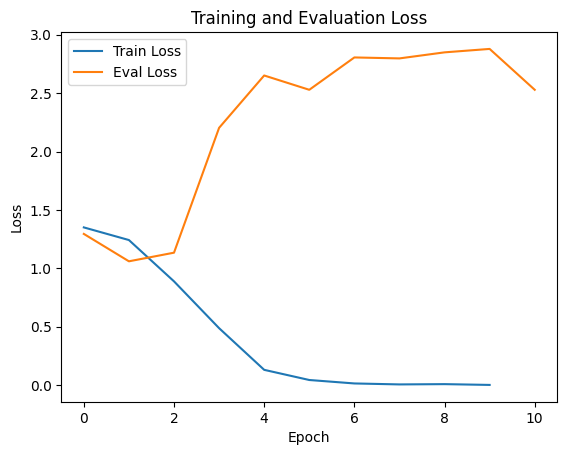

After cleanup:
Allocated: 3104.96 MiB
Cached: 4568.00 MiB
推論開始
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 4072.60 MiB
Cached: 5110.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 4072.60 MiB
Cached: 5110.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 4272.60 MiB
Cached: 5460.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 3877.60 MiB
Cached: 4716.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 3877.60 MiB
Cached: 4716.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Siz

,index,suicide risk,probability_distribution
0,0,indicator,"[0.99930739402771, 0.000183385956916, 0.000205..."
1,1,attempt,"[0.0009070833330042, 0.0029563179705291, 0.001..."
2,2,indicator,"[0.9992521405220032, 0.0003199299098923, 0.000..."
3,3,behavior,"[0.000200141876121, 0.0002022386179305, 0.9992..."
4,4,indicator,"[0.9978558421134948, 0.000562721164897, 0.0002..."
...,...,...,...
95,95,attempt,"[0.0007714967359788, 0.0014580854913219, 0.023..."
96,96,attempt,"[0.0015563496854156, 0.0010057508479803, 0.000..."
97,97,ideation,"[0.0001340154849458, 0.9995325803756712, 0.000..."
98,98,ideation,"[0.0001999756786972, 0.9995014667510986, 0.000..."


submits/20240928_confirm


In [32]:
from sklearn.model_selection import train_test_split
import pandas as pd

set_random_seed(42)

df_train = pd.read_csv('training set/posts with labels_add.csv')

# 文中の「.」の数をカウントし、1つ以下の行を削除する (testデータの最小文章長が60であるため、trainデータから60以下のデータを削除)
df_train = df_train[~((df_train['post'].str.count('\.') <= 1) & (df_train['post'].str.len() <= 60))]
# df_train = preprosessing_text(df_train, url_pattern)
print(df_train.shape)
# df_train_add = pd.read_csv('training set/extacted_posts with labels_add.csv')
# df_train_add = df_train_add.drop('post', axis=1)
# df_train_add.rename(columns={'extacted_post': 'post'}, inplace=True)
# # df_train_add = preprosessing_text(df_train_add, url_pattern)

# df_train = pd.concat([df_train, df_train_add], axis=0)
df_train = preprosessing_text(df_train, url_pattern)
# df_train = simple_fix_text(df_train, url_pattern)
display(df_train.head(3))
df_test = pd.read_excel('test set/test set.xlsx')
df_test = preprosessing_text(df_test, url_pattern)
# df_test = simple_fix_text(df_test, url_pattern)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 変換用の辞書を定義
conversion_dict = {
    'indicator': 0,
    'ideation': 1,
    'behavior': 2,
    'attempt': 3
}

df_train['post_risk'] = df_train['post_risk'].map(conversion_dict)

# 疑似ラベルxx%使用
# df_synthetic = pd.read_csv('training set/posts without labels_add_20240802_third.csv', index_col=0) # 疑似ラベルなしで最高精度が出たモデルで予測した疑似ラベル付与結果
# df_synthetic.reset_index(drop=False, inplace=True)
# df_synthetic.rename(columns={'index': 'index', 'suicide risk': 'post_risk'}, inplace=True)
# cols = list(df_train)
# df_synthetic = df_synthetic[cols]
# df_synthetic = preprosessing_text(df_synthetic, url_pattern)
# df_train = pd.concat([df_train, df_synthetic], axis=0)

y = df_train['post_risk']
train_data, val_data = train_test_split(df_train, test_size=0.3, random_state=42, stratify=y)

print('データ準備完了')

# epoch数
epoch = 10 # 5で十分な気がする。但し、LSTMの時は20くらい必要そう

model_list = [
    # 'bert-base-uncased', 'bert-large-uncased', 'mental-bert-large-uncased', 'mental-roberta-large',
    'mental-longformer-base-4096'
]

# コード実施日
save_date = '20240928_confirm'
date = f'{save_date}_first'

model_dir = f"models/{save_date}/{date}"
dir = f"results/{save_date}/{date}"

num_labels = 4

for md_name in model_list:

    if md_name == 'bert-base-uncased' or md_name == 'bert-large-uncased':
        MODEL_NAME = md_name
    else:
        MODEL_NAME = f'AIMH/{md_name}'
    print('Model Name:', MODEL_NAME)
    
    llm_classification(MODEL_NAME, train_data, val_data, df_test, epoch, model_dir, device, date, save_date, 'AAA')

    model = (AutoModelForSequenceClassification
          .from_pretrained(model_dir, num_labels=num_labels)
          .to(device))
    tokenizer = AutoTokenizer.from_pretrained(model_dir)

    # テストデータに対して推論
    model.eval()

    make_vector_data(model, tokenizer, df_test, device, dir, date, 'test', md_name)
    
    ################################################################################################
    del model, tokenizer
    cleanup_gpu_memory()
    ################################################################################################

    print('推論終了')
    df_sub = pd.read_csv(f'{dir}/submission_{md_name}.csv')
    
    df_sub = df_sub[['suicide risk', 'Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
    df_sub.reset_index(drop=False, inplace=True)
    df_sub.rename(columns={'index': 'index'}, inplace=True)
    df_sub['probability_distribution'] = df_sub[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']].values.tolist()
    df_sub = df_sub[['index', 'suicide risk', 'probability_distribution']]
    
    re_conversion_dict = {
        0: 'indicator',
        1: 'ideation',
        2: 'behavior',
        3: 'attempt'
    }
    
    df_sub['suicide risk'] = df_sub['suicide risk'].map(re_conversion_dict)
    print(df_sub.shape)
    display(df_sub)
    
    sub_dir = f'submits/{save_date}'
    
    print(sub_dir)
    if not os.path.exists(sub_dir): # ディレクトリが存在するか確認
        os.makedirs(sub_dir)
    
    df_sub.to_excel(f'{sub_dir}/mukumuku_submission_{md_name}.xlsx', float_format='%.30f', index=False)

# データ拡張による効果を検証

(488, 6)
(488, 6)


,index,post,post_risk,label,suicide_label,keyword_count
0,0,Just kill me. Please. Just end my life. I beg ...,ideation,Loss of loved ones,1,1
1,1,"There is no today, nor tommorrow. I do not hav...",behavior,Sexual orientation-related issues,1,2
2,2,Life so full of contradictions that it is not ...,indicator,Closed ones’ historic illness/suicide,1,1


データ準備完了
Model Name: AIMH/mental-longformer-base-4096
Initial memory usage:
Allocated: 3104.96 MiB
Cached: 4568.00 MiB
{'index': 191,
 'keyword_count': 2,
 'label': 'Others',
 'post': 'It is time. I have been writing here since june with the intention '
         'to end my own life. I never did it before, but now I feel ready. I '
         'am writing this with a loaded gun by my side and I am not sure what '
         'will happen once I post this. I could die or the attempt could fail, '
         'but it does not matter to me. I am not giving myself any more '
         'chances and I am not going to make any excuses. I am going to shoot '
         'myself. I have no more savings, my room is empty, and everything is '
         'gone. It is too late for me to turn back now. To those who tried to '
         'help me, thank you. I personally believe you should have never given '
         'me your time, but thank you. I hope you have long, successful lives '
         'and I hope you do not 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/683 [00:00<?, ? examples/s]

Map:   0%|          | 0/293 [00:00<?, ? examples/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at AIMH/mental-longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': [0, 243, 16, 86, 4, 38, 33, 57, 2410, 259, 187, 1236, 4438, 19, 5, 6589, 7, 253, 127, 308, 301, 4, 38, 393, 222, 24, 137, 6, 53, 122, 38, 619, 1227, 4, 38, 524, 2410, 42, 19, 10, 7973, 1751, 30, 127, 526, 8, 38, 524, 45, 686, 99, 40, 1369, 683, 38, 618, 42, 4, 38, 115, 1597, 50, 5, 2120, 115, 5998, 6, 53, 24, 473, 45, 948, 7, 162, 4, 38, 524, 45, 1311, 2185, 143, 55, 3255, 8, 38, 524, 45, 164, 7, 146, 143, 19791, 4, 38, 524, 164, 7, 4511, 2185, 4, 38, 33, 117, 55, 4522, 6, 127, 929, 16, 5802, 6, 8, 960, 16, 1613, 4, 85, 16, 350, 628, 13, 162, 7, 1004, 124, 122, 4, 598, 167, 54, 1381, 7, 244, 162, 6, 3392, 47, 4, 38, 5636, 679, 47, 197, 33, 393, 576, 162, 110, 86, 6, 53, 3392, 47, 4, 38, 1034, 47, 33, 251, 6, 1800, 1074, 8, 38, 1034, 47, 109, 45, 146, 5, 276, 6160, 25, 162, 4, 3401, 185, 575, 9, 31954, 8, 492, 31954, 3255, 4, 38, 216, 71, 38, 524, 626, 19, 99, 38, 240, 7, 109, 6, 38, 40, 45, 33, 5988, 3255, 4, 38, 33, 422, 66, 9, 3255, 4, 40142, 4, 2], 'attention_mask': [1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.328800,1.276232,0.395904,0.386037,0.364530,0.285491,0.504941,0.395904,0.323720
2,1.026200,0.996451,0.631399,0.478034,0.528501,0.493882,0.599743,0.631399,0.604578
3,0.698600,1.690537,0.662116,0.671872,0.565363,0.584438,0.668079,0.662116,0.645222
4,0.420400,1.416129,0.747440,0.745052,0.730273,0.736756,0.750437,0.747440,0.748137
5,0.157500,1.464871,0.764505,0.755638,0.765487,0.759981,0.765240,0.764505,0.764167
6,0.049800,1.717421,0.757679,0.766135,0.747325,0.754691,0.758712,0.757679,0.755813
7,0.033300,1.702470,0.747440,0.732177,0.742059,0.736118,0.748336,0.747440,0.746954
8,0.004900,1.703425,0.764505,0.742864,0.767217,0.752545,0.769013,0.764505,0.765577
9,0.008100,1.800559,0.761092,0.753096,0.747589,0.749747,0.760525,0.761092,0.760149
10,0.011900,1.784161,0.754266,0.748271,0.735377,0.741373,0.753327,0.754266,0.753517


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

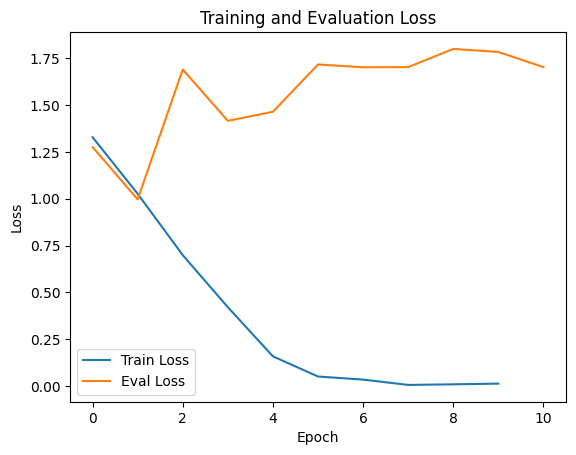

After cleanup:
Allocated: 3104.96 MiB
Cached: 4568.00 MiB
推論開始
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 4072.60 MiB
Cached: 5110.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 4072.60 MiB
Cached: 5110.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 4272.60 MiB
Cached: 5460.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 3877.60 MiB
Cached: 4716.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 3877.60 MiB
Cached: 4716.00 MiB
After cleanup:
Allocated: 3682.60 MiB
Cached: 4716.00 MiB
Shape of final_layer_vectors_test: torch.Siz

,index,suicide risk,probability_distribution
0,0,indicator,"[0.99982088804245, 6.04118758928e-05, 4.673511..."
1,1,attempt,"[0.0001691832148935, 0.0004293501551728, 0.000..."
2,2,indicator,"[0.9995993971824644, 0.000294168916298, 5.8582..."
3,3,behavior,"[9.95750087895e-05, 8.56648330227e-05, 0.99971..."
4,4,indicator,"[0.9964620471000672, 0.000214835468796, 8.5084..."
...,...,...,...
95,95,attempt,"[0.000214889034396, 0.0002363671374041, 0.0001..."
96,96,attempt,"[0.0001400970941176, 0.0001949412107933, 0.000..."
97,97,ideation,"[0.0001121377135859, 0.9998020529747008, 4.692..."
98,98,ideation,"[5.17001426487e-05, 0.9998477697372437, 5.4902..."


submits/20240928_confirm


In [34]:
from sklearn.model_selection import train_test_split
import pandas as pd

set_random_seed(42)

df_train = pd.read_csv('training set/posts with labels_add.csv')

# 文中の「.」の数をカウントし、1つ以下の行を削除する (testデータの最小文章長が60であるため、trainデータから60以下のデータを削除)
df_train = df_train[~((df_train['post'].str.count('\.') <= 1) & (df_train['post'].str.len() <= 60))]
print(df_train.shape)

df_train_add = pd.read_csv('training set/extacted_posts with labels_add.csv')
df_train_add = df_train_add.drop('post', axis=1)
df_train_add.rename(columns={'extacted_post': 'post'}, inplace=True)
print(df_train_add.shape)
# df_train_add = preprosessing_text(df_train_add, url_pattern)

df_train = pd.concat([df_train, df_train_add], axis=0)
df_train = preprosessing_text(df_train, url_pattern)
# df_train = simple_fix_text(df_train, url_pattern)
display(df_train.head(3))
df_test = pd.read_excel('test set/test set.xlsx')
df_test = preprosessing_text(df_test, url_pattern)
# df_test = simple_fix_text(df_test, url_pattern)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 変換用の辞書を定義
conversion_dict = {
    'indicator': 0,
    'ideation': 1,
    'behavior': 2,
    'attempt': 3
}

df_train['post_risk'] = df_train['post_risk'].map(conversion_dict)

# 疑似ラベルxx%使用
# df_synthetic = pd.read_csv('training set/posts without labels_add_20240802_third.csv', index_col=0) # 疑似ラベルなしで最高精度が出たモデルで予測した疑似ラベル付与結果
# df_synthetic.reset_index(drop=False, inplace=True)
# df_synthetic.rename(columns={'index': 'index', 'suicide risk': 'post_risk'}, inplace=True)
# cols = list(df_train)
# df_synthetic = df_synthetic[cols]
# df_synthetic = preprosessing_text(df_synthetic, url_pattern)
# df_train = pd.concat([df_train, df_synthetic], axis=0)

y = df_train['post_risk']
train_data, val_data = train_test_split(df_train, test_size=0.3, random_state=42, stratify=y)

print('データ準備完了')

# epoch数
epoch = 10 # 5で十分な気がする。但し、LSTMの時は20くらい必要そう

md_name = 'mental-longformer-base-4096'

# コード実施日
save_date = '20240928_confirm'
date = f'{save_date}_augmentation'

model_dir = f"models/{save_date}/{date}"
dir = f"results/{save_date}/{date}"

num_labels = 4


if md_name == 'bert-base-uncased' or md_name == 'bert-large-uncased':
    MODEL_NAME = md_name
else:
    MODEL_NAME = f'AIMH/{md_name}'
print('Model Name:', MODEL_NAME)

llm_classification(MODEL_NAME, train_data, val_data, df_test, epoch, model_dir, device, date, save_date, 'AAA')

model = (AutoModelForSequenceClassification
      .from_pretrained(model_dir, num_labels=num_labels)
      .to(device))
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# テストデータに対して推論
model.eval()

make_vector_data(model, tokenizer, df_test, device, dir, date, 'test', md_name)

################################################################################################
del model, tokenizer
cleanup_gpu_memory()
################################################################################################

print('推論終了')
df_sub = pd.read_csv(f'{dir}/submission_{md_name}_augmentation.csv')

df_sub = df_sub[['suicide risk', 'Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
df_sub.reset_index(drop=False, inplace=True)
df_sub.rename(columns={'index': 'index'}, inplace=True)
df_sub['probability_distribution'] = df_sub[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']].values.tolist()
df_sub = df_sub[['index', 'suicide risk', 'probability_distribution']]

re_conversion_dict = {
    0: 'indicator',
    1: 'ideation',
    2: 'behavior',
    3: 'attempt'
}

df_sub['suicide risk'] = df_sub['suicide risk'].map(re_conversion_dict)
print(df_sub.shape)
display(df_sub)

sub_dir = f'submits/{save_date}'

print(sub_dir)
if not os.path.exists(sub_dir): # ディレクトリが存在するか確認
    os.makedirs(sub_dir)

df_sub.to_excel(f'{sub_dir}/mukumuku_submission_{md_name}_augmentation.xlsx', float_format='%.30f', index=False)

# 各ロスの効果を検証

In [25]:
import torch
import torch.nn as nn
from transformers.trainer_utils import set_seed
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import pandas as pd
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from pprint import pprint
from datasets import Dataset
from typing import Union
from transformers import BatchEncoding, EarlyStoppingCallback
from collections import Counter
import os
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import random

def set_random_seed(seed: int = 42):
    set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
    # 再現性を保つための設定
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # print("乱数シード設定完了")

set_random_seed(42)

## set custom loss ##

## Label Smoothing
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, num_classes: int = 4):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
        self.num_classes = num_classes

    def forward(self, pred, target):
        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        loss = (-true_dist * log_softmax_pred).sum(dim=1)
        return loss.mean()

## Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha: float = 1.0, gamma: float = 2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, pred, target):
        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        return focal_loss.gather(1, target.unsqueeze(1)).mean()


## Class Balanced Loss
class ClassBalancedLoss(nn.Module):
    def __init__(self, beta: float = 0.999, num_classes: int = 4, samples_per_class: list = None):
        super(ClassBalancedLoss, self).__init__()
        self.beta = beta
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class

        if samples_per_class is not None:
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        device = pred.device
        self.weights = self.weights.to(device)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        loss = -log_softmax_pred.gather(1, target.unsqueeze(1))
        loss = loss * self.weights[target].unsqueeze(1)
        return loss.mean()

## Label Smoothing×Focal Loss
class LabelSmoothingFocalLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, alpha: float = 1.0, gamma: float = 2.0, num_classes: int = 4):
        super(LabelSmoothingFocalLoss, self).__init__()
        self.smoothing = smoothing
        self.alpha = alpha
        self.gamma = gamma
        self.num_classes = num_classes

    def forward(self, pred, target):
        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        loss = (focal_loss * true_dist).sum(dim=1)
        return loss.mean()


## Label Smoothing×Class Balanced Loss
class LabelSmoothingClassBalancedLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, beta: float = 0.999, num_classes: int = 4, samples_per_class: list = None):
        super(LabelSmoothingClassBalancedLoss, self).__init__()
        self.smoothing = smoothing
        self.beta = beta
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class

        if samples_per_class is not None:
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        device = pred.device
        self.weights = self.weights.to(device)
        
        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)
        
        log_softmax_pred = torch.log_softmax(pred, dim=1)
        loss = (-true_dist * log_softmax_pred).sum(dim=1)
        loss = loss * self.weights[target].unsqueeze(1)
        return loss.mean()


## Focal Loss×Class Balanced Loss
class FocalClassBalancedLoss(nn.Module):
    def __init__(self, alpha: float = 1.0, beta: float = 0.999, gamma: float = 2.0, num_classes: int = 4, samples_per_class: list = None):
        super(FocalClassBalancedLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class

        if samples_per_class is not None:
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        device = pred.device
        self.weights = self.weights.to(device)

        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        loss = focal_loss.gather(1, target.unsqueeze(1))
        loss = loss * self.weights[target].unsqueeze(1)
        return loss.mean()


## ラベルスムージング、Focal Loss、Class Balanced Lossの組み合わせ
class LabelSmoothingFocalClassBalancedLoss(nn.Module):
    def __init__(self, smoothing: float = 0.1, alpha: float = 1.0, beta: float = 0.999, gamma: float = 2.0, num_classes: int = 4, samples_per_class: list = None):
        super(LabelSmoothingFocalClassBalancedLoss, self).__init__()
        self.smoothing = smoothing
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.num_classes = num_classes
        self.samples_per_class = samples_per_class
        
        if samples_per_class is not None:
            # calculate weight of ClassBalancedLoss
            effective_num = 1.0 - np.power(self.beta, samples_per_class)
            self.weights = (1.0 - self.beta) / np.array(effective_num)
            self.weights = self.weights / np.sum(self.weights) * num_classes
            self.weights = torch.tensor(self.weights, dtype=torch.float32)
        else:
            self.weights = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, pred, target):
        # predと同じデバイスにweightsを移動
        device = pred.device
        self.weights = self.weights.to(device)

        def custom_smoothing(target, num_classes, smoothing):
            with torch.no_grad():
                true_dist = torch.zeros_like(pred)
                for i in range(len(target)):
                    target_class = target[i].item()
                    for j in range(num_classes):
                        distance = abs(target_class - j)
                        if distance == 0:
                            true_dist[i][j] = 1.0 - smoothing
                        elif distance == 1:
                            true_dist[i][j] = smoothing
                        # 二つ外れていたらそれはノイジーではなく、単純に選択されない
                        # else:
                        #     true_dist[i][j] = smoothing / 2
                return true_dist
        
        true_dist = custom_smoothing(target, self.num_classes, self.smoothing)

        # log_softmax_predはFocal Lossのlog(p_mi)を示す
        log_softmax_pred = torch.log_softmax(pred, dim=1)
        pt = torch.exp(log_softmax_pred)
        
        focal_loss = -self.alpha * (1 - pt) ** self.gamma * log_softmax_pred
        # smoothing * focal loss
        loss = (focal_loss * true_dist).sum(dim=1)
        # loss * class balanced loss
        final_loss = loss * self.weights[target].unsqueeze(1)
        
        return torch.mean(final_loss)

# カスタムTrainerクラスの定義
class CustomTrainer(Trainer):
    def __init__(self, *args, criterion=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.criterion = criterion

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # Forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # Compute custom loss
        loss = self.criterion(logits, labels)
        return (loss, outputs) if return_outputs else loss

def report_memory():
    print(f"Allocated: {torch.cuda.memory_allocated() / 1024 ** 2:.2f} MiB")
    print(f"Cached: {torch.cuda.memory_reserved() / 1024 ** 2:.2f} MiB")

def cleanup_gpu_memory():
    """
    GPUキャッシュを空にし、CUDAメモリをリセットし、メモリ使用状況を表示する関数。
    """
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    torch.cuda.reset_accumulated_memory_stats()

    print("After cleanup:")
    report_memory()

# def load_data(train_path: str, valid_path: str):
def load_data(original_train_df, valid_df):
    train_dataset = Dataset.from_pandas(original_train_df)
    valid_dataset = Dataset.from_pandas(valid_df)

    pprint(train_dataset[0])
    return train_dataset, valid_dataset

def tokenize_data(train_dataset, valid_dataset, model_name: str):
    set_random_seed(42)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    print(type(tokenizer).__name__)

    tokens = tokenizer.tokenize(train_dataset[0]['post'])
    print(tokens)

    def preprocess_text_classification(example: dict[str, Union[str, int]]) -> BatchEncoding:
        # トークナイザーの最大シーケンス長を取得
        max_length = tokenizer.model_max_length
        try:
            encoded_example = tokenizer(example["post"], max_length=4096, truncation=True, padding='longest')
            encoded_example["labels"] = example["post_risk"]
            return encoded_example
        except Exception as e:
            print(f"Error processing example: {example}")
            print(f"Error message: {e}")
            raise e

    try:
        encoded_train_dataset = train_dataset.map(preprocess_text_classification, remove_columns=train_dataset.column_names)
        encoded_valid_dataset = valid_dataset.map(preprocess_text_classification, remove_columns=valid_dataset.column_names)
    except Exception as e:
        print(f"Error during dataset mapping: {e}")
        raise e
    # encoded_test_dataset = test_dataset.map(preprocess_text_classification, remove_columns=valid_dataset.column_names)
    print(encoded_train_dataset[0])
    return encoded_train_dataset, encoded_valid_dataset, tokenizer

def prepare_model(model_name: str, num_labels: int):
    set_random_seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = (AutoModelForSequenceClassification
             .from_pretrained(model_name, num_labels=num_labels)
             .to(device))
    return model

def prepare_trainer(model, encoded_train_dataset, encoded_valid_dataset, tokenizer, epoch, samples_per_class, num_labels, criterion_name, output_dir: str):
    set_random_seed(42)
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    training_args = TrainingArguments(
        output_dir=output_dir,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        learning_rate=2e-5,
        lr_scheduler_type="linear",
        warmup_ratio=0.1,
        num_train_epochs=epoch,
        save_strategy="epoch", # エポックごとに保存
        save_total_limit=1, # 最新の1つだけを保存
        logging_strategy="epoch", # エポックごとにログ保存
        evaluation_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1_weighted",
        fp16=True,
        seed=42,
    )

    def compute_metrics(eval_pred):
        predictions, labels = eval_pred
        predictions = np.argmax(predictions, axis=1)
        accuracy = accuracy_score(labels, predictions)
        precision_weighted = precision_score(labels, predictions, average='weighted')
        recall_weighted = recall_score(labels, predictions, average='weighted')
        f1_weighted = f1_score(labels, predictions, average='weighted')
        precision_macro = precision_score(labels, predictions, average='macro')
        recall_macro = recall_score(labels, predictions, average='macro')
        f1_macro = f1_score(labels, predictions, average='macro')
        return {"accuracy": accuracy, "precision_macro": precision_macro, "recall_macro": recall_macro, "f1_macro": f1_macro, "precision_weighted": precision_weighted, "recall_weighted": recall_weighted, "f1_weighted": f1_weighted}
    
    if criterion_name == 'LabelSmoothingLoss':
        criterion = LabelSmoothingLoss(smoothing=0.1, num_classes=num_labels)
    elif criterion_name == 'FocalLoss':
        criterion = FocalLoss(alpha=1.0, gamma=2.0)
    elif criterion_name == 'ClassBalancedLoss':
        criterion = ClassBalancedLoss(beta=0.999, num_classes=num_labels, samples_per_class=samples_per_class)
    elif criterion_name == 'LabelSmoothingFocalLoss':
        criterion = LabelSmoothingFocalLoss(smoothing=0.1, alpha=1.0, gamma=2.0, num_classes=num_labels)
    elif criterion_name == 'LabelSmoothingClassBalancedLoss':
        criterion = LabelSmoothingClassBalancedLoss(smoothing=0.1, beta=0.999, num_classes=num_labels, samples_per_class=samples_per_class)
    elif criterion_name == 'FocalClassBalancedLoss':
        criterion = FocalClassBalancedLoss(alpha=1.0, beta=0.999, gamma=2.0, num_classes=num_labels, samples_per_class=samples_per_class)
    else:
        criterion = LabelSmoothingFocalClassBalancedLoss(smoothing=0.1, alpha=1.0, beta=0.999, gamma=2.0, num_classes=num_labels, samples_per_class=samples_per_class)
        
    trainer = CustomTrainer(
        model = model,
        args = training_args,
        train_dataset = encoded_train_dataset,
        eval_dataset = encoded_valid_dataset,
        tokenizer = tokenizer,
        data_collator = data_collator,
        compute_metrics = compute_metrics,
        callbacks = [EarlyStoppingCallback(early_stopping_patience=3)], # add early stopping
        criterion = criterion
    )
    
    return trainer

def train_and_evaluate(trainer):
    set_random_seed(42)
    trainer.train()
    return trainer

def save_predictions(trainer, encoded_valid_dataset, valid_dataset, output_file: str):
    set_random_seed(42)
    predictions = trainer.predict(encoded_valid_dataset)
    predictions_df = pd.DataFrame({
        'post_risk': predictions.label_ids,
        'predicted_label': predictions.predictions.argmax(axis=1),
        'post': valid_dataset["post"]
    })
    predictions_df.to_csv(output_file, index=False)

def evaluate_predictions(predictions_df, output_file: str):
    conf_matrix = confusion_matrix(predictions_df['post_risk'], predictions_df['predicted_label'])
    unique_labels = sorted(set(predictions_df['post_risk'].unique()) | set(predictions_df['predicted_label'].unique()))
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=unique_labels, index=unique_labels)
    conf_matrix_df.to_csv(output_file)

    accuracy = accuracy_score(predictions_df['post_risk'], predictions_df['predicted_label'])
    precision = precision_score(predictions_df['post_risk'], predictions_df['predicted_label'], average='macro')
    recall = recall_score(predictions_df['post_risk'], predictions_df['predicted_label'], average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

def make_vector_data(model, tokenizer, df, device, dir, date, kind, criterion_name):
    if not os.path.exists(dir): # ディレクトリが存在するか確認
        os.makedirs(dir)
        
    # 100行ずつ実行
    num_rows_per_df = 10
    dfs = [df.iloc[i:i + num_rows_per_df] for i in range(0, len(df), num_rows_per_df)]
    
    print('推論開始')
    
    # 処理後のデータフレームを保存するリスト
    processed_dfs = []
    submit_dfs = []

    max_length = tokenizer.model_max_length

    print('model_max_length:', max_length)
    
    for i, df_part in enumerate(dfs):
        set_random_seed(42)
    
        df_part = df_part.reset_index(drop=True)
        
        data_list = df_part['post'].values.tolist()
        inputs = tokenizer(data_list, return_tensors='pt', max_length=max_length, truncation=True, padding='longest')
    
        # 入力データをモデルと同じデバイスに転送
        inputs = {k: v.to(device) for k, v in inputs.items()}
    
        with torch.no_grad():
            outputs = model(**inputs, output_hidden_states=True)
            # 最終層付近4つのベクトル抽出
            final_layer_vectors = torch.cat([outputs["hidden_states"][-1*i][:,0] for i in range(1, 4+1)], dim=1)
            print(f"Shape of final_layer_vectors_{kind}: {final_layer_vectors.shape}")
    
        # mean_vectors = final_layer_vectors.mean(dim=1).cpu().numpy()
        final_layer_vectors = final_layer_vectors.cpu().numpy()
        df_vec = pd.DataFrame(final_layer_vectors).reset_index(drop=True)

        if kind == 'test':
            pass
        else:
            df_vec['post_risk'] = df_part['post_risk']
            print('')
            print('学習用・評価用データに対する予測結果の抽出完了')
    
        ################################################################################################
        del data_list, inputs, final_layer_vectors
        cleanup_gpu_memory()
        ################################################################################################
    
        # 予測結果取得
        logits = outputs.logits
        pred = F.softmax(logits, dim=-1)
        df_pred = pd.DataFrame(pred.cpu().numpy(), columns=['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']).reset_index(drop=True)
    
        result_df = pd.DataFrame(pred.cpu().numpy().argmax(axis=1), columns=['suicide risk']).reset_index(drop=True)
    
        df_merged = pd.concat([result_df, df_pred], axis=1)
        df_merged['post'] = df_part['post']
        # df_merged['label'] = df_part['label']
        # df_merged['suicide_label'] = df_part['suicide_label']
        # df_merged['keyword_count'] = df_part['keyword_count']
        df_merged = pd.concat([df_merged, df_vec], axis=1)
        submit_dfs.append(df_merged)
    
        ################################################################################################
        del logits, outputs, pred, df_pred, result_df, df_part, df_merged, df_vec
        cleanup_gpu_memory()
        ################################################################################################

    df_submit = pd.concat(submit_dfs, ignore_index=True)
    df_submit.to_csv(f'{dir}/submission_{criterion_name}.csv', float_format='%.30f')
    ################################################################################################
    del submit_dfs, df_submit, dfs
    cleanup_gpu_memory()
    ################################################################################################


def llm_classification(MODEL_NAME, original_train_df, valid_df, test_df, epoch, model_dir, device, date, save_date, criterion_name):
    set_random_seed(42)

    print("Initial memory usage:")
    report_memory()

    dir = f"results/{save_date}/{date}"
    if not os.path.exists(dir): # ディレクトリが存在するか確認
        os.makedirs(dir)

    original_train_df = original_train_df.reset_index(drop=True)
    valid_df = valid_df.reset_index(drop=True)

    train_dataset, valid_dataset = load_data(original_train_df, valid_df)
    encoded_train_dataset, encoded_valid_dataset, tokenizer = tokenize_data(train_dataset, valid_dataset, MODEL_NAME)

    # クラスごとのサンプル数を計算
    labels = train_dataset["post_risk"]
    num_classes = len(set(labels))
    print('num_classes:', num_classes)
    samples_per_class = [labels.count(i) for i in range(num_classes)]
    print('samples_per_class')
    print(samples_per_class)
    
    labels = [example["post_risk"] for example in train_dataset]
    num_labels = np.max(labels) + 1
    print('num_labels:', num_labels)

    model = prepare_model(MODEL_NAME, num_labels)

    trainer = prepare_trainer(model, encoded_train_dataset, encoded_valid_dataset, tokenizer, epoch, samples_per_class, num_labels, criterion_name, "output_wrime")
    trainer = train_and_evaluate(trainer)
    # save_predictions(trainer, encoded_valid_dataset, valid_dataset, f"{dir}/results_lmm_{date}.csv")

    # predictions_df = pd.read_csv(f"{dir}/results_lmm_{date}.csv")
    # evaluate_predictions(predictions_df, f"{dir}/confusion_matrix_llm_{date}.csv")

    # モデルの評価
    trainer.evaluate()

    ## 学習曲線の表示 ##

    # 学習曲線の保存
    # ログファイルから学習曲線のデータを取得
    logs = trainer.state.log_history

    # 学習と検証の損失をプロット
    train_loss = [log['loss'] for log in logs if 'loss' in log]
    eval_loss = [log['eval_loss'] for log in logs if 'eval_loss' in log]

    plt.plot(train_loss, label='Train Loss')
    plt.plot(eval_loss, label='Eval Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Evaluation Loss')

    # 図を表示
    plt.show()

    # モデルとトークナイズの保存
    model.save_pretrained(model_dir)
    tokenizer.save_pretrained(model_dir)

    ################################################################################################
    del model, tokenizer, trainer
    cleanup_gpu_memory()
    ################################################################################################


(488, 6)
(488, 6)


,index,post,post_risk,label,suicide_label,keyword_count
0,0,Just kill me. Please. Just end my life. I beg ...,ideation,Loss of loved ones,1,1
1,1,"There is no today, nor tommorrow. I do not hav...",behavior,Sexual orientation-related issues,1,2
2,2,Life so full of contradictions that it is not ...,indicator,Closed ones’ historic illness/suicide,1,1


Model Name: AIMH/mental-longformer-base-4096
データ準備完了
Loss: LabelSmoothingClassBalancedLoss
Initial memory usage:
Allocated: 3910.04 MiB
Cached: 3950.00 MiB
{'index': 191,
 'keyword_count': 2,
 'label': 'Others',
 'post': 'It is time. I have been writing here since june with the intention '
         'to end my own life. I never did it before, but now I feel ready. I '
         'am writing this with a loaded gun by my side and I am not sure what '
         'will happen once I post this. I could die or the attempt could fail, '
         'but it does not matter to me. I am not giving myself any more '
         'chances and I am not going to make any excuses. I am going to shoot '
         'myself. I have no more savings, my room is empty, and everything is '
         'gone. It is too late for me to turn back now. To those who tried to '
         'help me, thank you. I personally believe you should have never given '
         'me your time, but thank you. I hope you have long, successful li

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/683 [00:00<?, ? examples/s]

Map:   0%|          | 0/293 [00:00<?, ? examples/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at AIMH/mental-longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': [0, 243, 16, 86, 4, 38, 33, 57, 2410, 259, 187, 1236, 4438, 19, 5, 6589, 7, 253, 127, 308, 301, 4, 38, 393, 222, 24, 137, 6, 53, 122, 38, 619, 1227, 4, 38, 524, 2410, 42, 19, 10, 7973, 1751, 30, 127, 526, 8, 38, 524, 45, 686, 99, 40, 1369, 683, 38, 618, 42, 4, 38, 115, 1597, 50, 5, 2120, 115, 5998, 6, 53, 24, 473, 45, 948, 7, 162, 4, 38, 524, 45, 1311, 2185, 143, 55, 3255, 8, 38, 524, 45, 164, 7, 146, 143, 19791, 4, 38, 524, 164, 7, 4511, 2185, 4, 38, 33, 117, 55, 4522, 6, 127, 929, 16, 5802, 6, 8, 960, 16, 1613, 4, 85, 16, 350, 628, 13, 162, 7, 1004, 124, 122, 4, 598, 167, 54, 1381, 7, 244, 162, 6, 3392, 47, 4, 38, 5636, 679, 47, 197, 33, 393, 576, 162, 110, 86, 6, 53, 3392, 47, 4, 38, 1034, 47, 33, 251, 6, 1800, 1074, 8, 38, 1034, 47, 109, 45, 146, 5, 276, 6160, 25, 162, 4, 3401, 185, 575, 9, 31954, 8, 492, 31954, 3255, 4, 38, 216, 71, 38, 524, 626, 19, 99, 38, 240, 7, 109, 6, 38, 40, 45, 33, 5988, 3255, 4, 38, 33, 422, 66, 9, 3255, 4, 40142, 4, 2], 'attention_mask': [1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,1.075400,1.007766,0.501706,0.405682,0.426212,0.390131,0.506446,0.501706,0.470807
2,0.877000,0.947020,0.648464,0.715299,0.595474,0.629429,0.671519,0.648464,0.646055
3,0.649700,1.057407,0.631399,0.662014,0.511889,0.507715,0.641352,0.631399,0.592457
4,0.516200,0.972440,0.726962,0.729561,0.702693,0.713625,0.731384,0.726962,0.726626
5,0.470100,0.928641,0.750853,0.767430,0.725595,0.740190,0.754018,0.750853,0.748174
6,0.431600,0.962690,0.754266,0.747130,0.741216,0.743370,0.755717,0.754266,0.754265
7,0.408200,0.989600,0.750853,0.730345,0.732025,0.730944,0.750515,0.750853,0.750470
8,0.411100,0.975369,0.764505,0.753238,0.738805,0.745143,0.763929,0.764505,0.763772
9,0.402300,0.984475,0.747440,0.743012,0.717325,0.727524,0.746592,0.747440,0.744575
10,0.400200,0.987458,0.750853,0.745561,0.719998,0.730559,0.749971,0.750853,0.748350


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


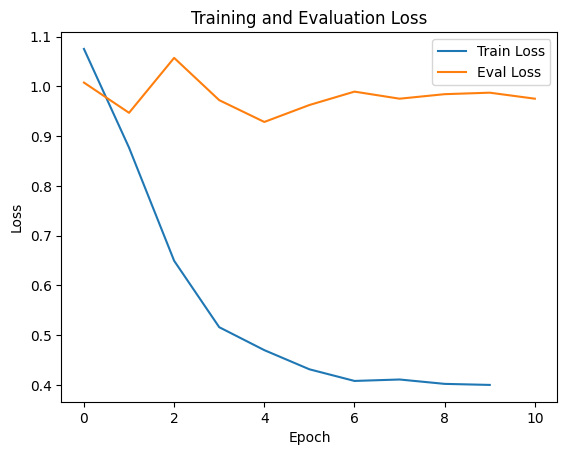

After cleanup:
Allocated: 1953.79 MiB
Cached: 2162.00 MiB
推論開始
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2916.13 MiB
Cached: 3404.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2916.13 MiB
Cached: 3404.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 3116.13 MiB
Cached: 3394.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2726.13 MiB
Cached: 2972.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2726.13 MiB
Cached: 2972.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Siz

,index,suicide risk,probability_distribution
0,0,indicator,"[0.9015296697616576, 0.0978992730379104, 0.000..."
1,1,attempt,"[0.000199049769435, 0.0004648166941478, 0.0872..."
2,2,indicator,"[0.90936279296875, 0.0901281759142875, 0.00036..."
3,3,behavior,"[0.0003236124757677, 0.0787502229213714, 0.831..."
4,4,indicator,"[0.907956838607788, 0.0911773890256881, 0.0004..."
...,...,...,...
95,95,attempt,"[0.0002232321421615, 0.0005078698159195, 0.080..."
96,96,attempt,"[0.0002234382845927, 0.0004472873988561, 0.087..."
97,97,ideation,"[0.0857914090156555, 0.8290529251098632, 0.084..."
98,98,ideation,"[0.0800866857171058, 0.8237247467041015, 0.095..."


submits/20240928_confirm
Loss: FocalClassBalancedLoss
Initial memory usage:
Allocated: 1953.79 MiB
Cached: 2162.00 MiB
{'index': 191,
 'keyword_count': 2,
 'label': 'Others',
 'post': 'It is time. I have been writing here since june with the intention '
         'to end my own life. I never did it before, but now I feel ready. I '
         'am writing this with a loaded gun by my side and I am not sure what '
         'will happen once I post this. I could die or the attempt could fail, '
         'but it does not matter to me. I am not giving myself any more '
         'chances and I am not going to make any excuses. I am going to shoot '
         'myself. I have no more savings, my room is empty, and everything is '
         'gone. It is too late for me to turn back now. To those who tried to '
         'help me, thank you. I personally believe you should have never given '
         'me your time, but thank you. I hope you have long, successful lives '
         'and I hope you do not

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/683 [00:00<?, ? examples/s]

Map:   0%|          | 0/293 [00:00<?, ? examples/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at AIMH/mental-longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': [0, 243, 16, 86, 4, 38, 33, 57, 2410, 259, 187, 1236, 4438, 19, 5, 6589, 7, 253, 127, 308, 301, 4, 38, 393, 222, 24, 137, 6, 53, 122, 38, 619, 1227, 4, 38, 524, 2410, 42, 19, 10, 7973, 1751, 30, 127, 526, 8, 38, 524, 45, 686, 99, 40, 1369, 683, 38, 618, 42, 4, 38, 115, 1597, 50, 5, 2120, 115, 5998, 6, 53, 24, 473, 45, 948, 7, 162, 4, 38, 524, 45, 1311, 2185, 143, 55, 3255, 8, 38, 524, 45, 164, 7, 146, 143, 19791, 4, 38, 524, 164, 7, 4511, 2185, 4, 38, 33, 117, 55, 4522, 6, 127, 929, 16, 5802, 6, 8, 960, 16, 1613, 4, 85, 16, 350, 628, 13, 162, 7, 1004, 124, 122, 4, 598, 167, 54, 1381, 7, 244, 162, 6, 3392, 47, 4, 38, 5636, 679, 47, 197, 33, 393, 576, 162, 110, 86, 6, 53, 3392, 47, 4, 38, 1034, 47, 33, 251, 6, 1800, 1074, 8, 38, 1034, 47, 109, 45, 146, 5, 276, 6160, 25, 162, 4, 3401, 185, 575, 9, 31954, 8, 492, 31954, 3255, 4, 38, 216, 71, 38, 524, 626, 19, 99, 38, 240, 7, 109, 6, 38, 40, 45, 33, 5988, 3255, 4, 38, 33, 422, 66, 9, 3255, 4, 40142, 4, 2], 'attention_mask': [1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.620900,0.567335,0.433447,0.419935,0.390489,0.331462,0.550863,0.433447,0.392429
2,0.482600,0.483050,0.682594,0.730764,0.624684,0.654577,0.697216,0.682594,0.673424
3,0.228600,0.778868,0.648464,0.724457,0.581374,0.609634,0.684743,0.648464,0.629985
4,0.087900,0.601254,0.733788,0.753293,0.724403,0.735518,0.740016,0.733788,0.735089
5,0.012400,0.608984,0.754266,0.732146,0.750044,0.739057,0.761335,0.754266,0.755850
6,0.005800,0.674634,0.761092,0.756268,0.744850,0.749235,0.762490,0.761092,0.760122
7,0.000500,0.695071,0.764505,0.763452,0.738355,0.748441,0.766030,0.764505,0.762547
8,0.000100,0.691855,0.771331,0.778874,0.753887,0.765028,0.771782,0.771331,0.770519
9,0.000000,0.711503,0.767918,0.779632,0.748355,0.761441,0.769633,0.767918,0.766264
10,0.000100,0.712993,0.767918,0.771533,0.749275,0.758786,0.768834,0.767918,0.766571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


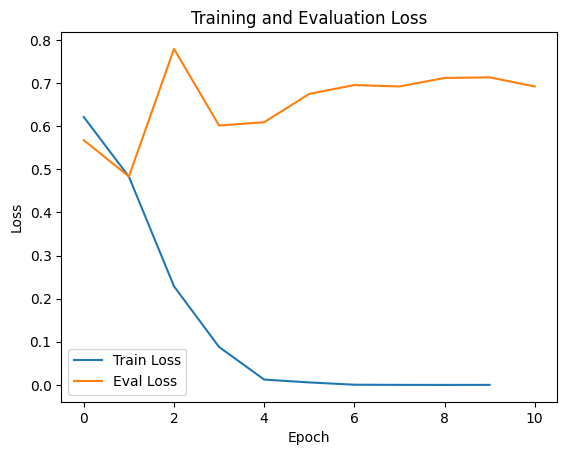

After cleanup:
Allocated: 1953.79 MiB
Cached: 2162.00 MiB
推論開始
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2916.13 MiB
Cached: 3404.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2916.13 MiB
Cached: 3404.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 3116.13 MiB
Cached: 3394.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2726.13 MiB
Cached: 2972.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2726.13 MiB
Cached: 2972.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Siz

,index,suicide risk,probability_distribution
0,0,indicator,"[0.9680697321891784, 0.0252623986452817, 0.002..."
1,1,attempt,"[0.0036207525990903, 0.0097101908177137, 0.015..."
2,2,ideation,"[0.37168949842453, 0.6162182092666625, 0.00826..."
3,3,behavior,"[0.0016892858548089, 0.0065233162604272, 0.985..."
4,4,indicator,"[0.8647271990776062, 0.0878568142652511, 0.006..."
...,...,...,...
95,95,attempt,"[0.0036096372641623, 0.0047901258803904, 0.009..."
96,96,attempt,"[0.0042210342362523, 0.004933291580528, 0.0109..."
97,97,ideation,"[0.006057190708816, 0.983311891555786, 0.00878..."
98,98,ideation,"[0.0039674541912972, 0.988349199295044, 0.0060..."


submits/20240928_confirm
Loss: LabelSmoothingFocalClassBalancedLoss
Initial memory usage:
Allocated: 1953.79 MiB
Cached: 2162.00 MiB
{'index': 191,
 'keyword_count': 2,
 'label': 'Others',
 'post': 'It is time. I have been writing here since june with the intention '
         'to end my own life. I never did it before, but now I feel ready. I '
         'am writing this with a loaded gun by my side and I am not sure what '
         'will happen once I post this. I could die or the attempt could fail, '
         'but it does not matter to me. I am not giving myself any more '
         'chances and I am not going to make any excuses. I am going to shoot '
         'myself. I have no more savings, my room is empty, and everything is '
         'gone. It is too late for me to turn back now. To those who tried to '
         'help me, thank you. I personally believe you should have never given '
         'me your time, but thank you. I hope you have long, successful lives '
         'and I h

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/683 [00:00<?, ? examples/s]

Map:   0%|          | 0/293 [00:00<?, ? examples/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at AIMH/mental-longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': [0, 243, 16, 86, 4, 38, 33, 57, 2410, 259, 187, 1236, 4438, 19, 5, 6589, 7, 253, 127, 308, 301, 4, 38, 393, 222, 24, 137, 6, 53, 122, 38, 619, 1227, 4, 38, 524, 2410, 42, 19, 10, 7973, 1751, 30, 127, 526, 8, 38, 524, 45, 686, 99, 40, 1369, 683, 38, 618, 42, 4, 38, 115, 1597, 50, 5, 2120, 115, 5998, 6, 53, 24, 473, 45, 948, 7, 162, 4, 38, 524, 45, 1311, 2185, 143, 55, 3255, 8, 38, 524, 45, 164, 7, 146, 143, 19791, 4, 38, 524, 164, 7, 4511, 2185, 4, 38, 33, 117, 55, 4522, 6, 127, 929, 16, 5802, 6, 8, 960, 16, 1613, 4, 85, 16, 350, 628, 13, 162, 7, 1004, 124, 122, 4, 598, 167, 54, 1381, 7, 244, 162, 6, 3392, 47, 4, 38, 5636, 679, 47, 197, 33, 393, 576, 162, 110, 86, 6, 53, 3392, 47, 4, 38, 1034, 47, 33, 251, 6, 1800, 1074, 8, 38, 1034, 47, 109, 45, 146, 5, 276, 6160, 25, 162, 4, 3401, 185, 575, 9, 31954, 8, 492, 31954, 3255, 4, 38, 216, 71, 38, 524, 626, 19, 99, 38, 240, 7, 109, 6, 38, 40, 45, 33, 5988, 3255, 4, 38, 33, 422, 66, 9, 3255, 4, 40142, 4, 2], 'attention_mask': [1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro,Precision Weighted,Recall Weighted,F1 Weighted
1,0.611900,0.517917,0.522184,0.420486,0.417292,0.400987,0.505176,0.522184,0.494844
2,0.490900,0.439317,0.665529,0.712273,0.602628,0.622083,0.685350,0.665529,0.662082
3,0.287100,0.460401,0.723549,0.772228,0.684191,0.710129,0.731581,0.723549,0.714559
4,0.229200,0.465456,0.740614,0.725016,0.713383,0.715674,0.746675,0.740614,0.739438
5,0.181200,0.473638,0.761092,0.796516,0.733492,0.755596,0.766260,0.761092,0.758814
6,0.170300,0.504729,0.737201,0.744072,0.717555,0.726995,0.737798,0.737201,0.734002
7,0.156100,0.508267,0.764505,0.762581,0.737425,0.746130,0.768262,0.764505,0.763137
8,0.154200,0.501470,0.778157,0.781504,0.754183,0.765790,0.778225,0.778157,0.777006
9,0.151500,0.516690,0.761092,0.739978,0.736603,0.737195,0.760827,0.761092,0.759791
10,0.152800,0.519539,0.767918,0.754481,0.745146,0.749066,0.767900,0.767918,0.767177


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


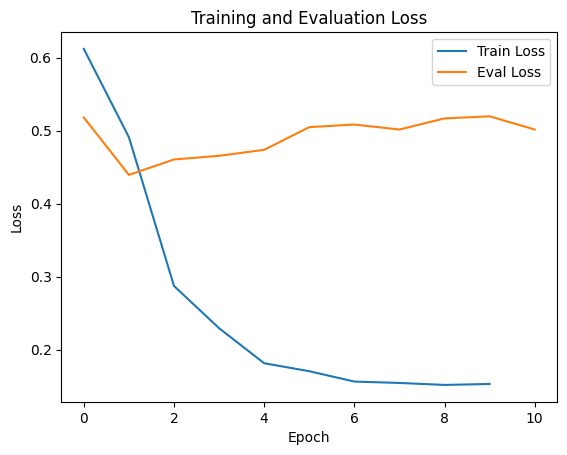

After cleanup:
Allocated: 1953.79 MiB
Cached: 2162.00 MiB
推論開始
model_max_length: 4096
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2916.13 MiB
Cached: 3404.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2916.13 MiB
Cached: 3404.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 3116.13 MiB
Cached: 3394.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2726.13 MiB
Cached: 2972.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Size([10, 3072])
After cleanup:
Allocated: 2726.13 MiB
Cached: 2972.00 MiB
After cleanup:
Allocated: 2526.13 MiB
Cached: 2650.00 MiB
Shape of final_layer_vectors_test: torch.Siz

,index,suicide risk,probability_distribution
0,0,indicator,"[0.6884636878967285, 0.3087780475616455, 0.001..."
1,1,attempt,"[0.0010663917055353, 0.0026334270369261, 0.308..."
2,2,indicator,"[0.6837077736854553, 0.3132228851318359, 0.002..."
3,3,behavior,"[0.0013418140588328, 0.1687996685504913, 0.619..."
4,4,indicator,"[0.6834678649902343, 0.3133050501346588, 0.002..."
...,...,...,...
95,95,attempt,"[0.0008714328869245, 0.0028217157814651, 0.310..."
96,96,attempt,"[0.0010599712841212, 0.0026600777637213, 0.315..."
97,97,ideation,"[0.1939263343811035, 0.6019292473793029, 0.202..."
98,98,ideation,"[0.186306744813919, 0.6063494086265563, 0.2060..."


submits/20240928_confirm


In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd

set_random_seed(42)

df_train = pd.read_csv('training set/posts with labels_add.csv')

# 文中の「.」の数をカウントし、1つ以下の行を削除する (testデータの最小文章長が60であるため、trainデータから60以下のデータを削除)
df_train = df_train[~((df_train['post'].str.count('\.') <= 1) & (df_train['post'].str.len() <= 60))]
print(df_train.shape)

df_train_add = pd.read_csv('training set/extacted_posts with labels_add.csv')
df_train_add = df_train_add.drop('post', axis=1)
df_train_add.rename(columns={'extacted_post': 'post'}, inplace=True)
print(df_train_add.shape)
# df_train_add = preprosessing_text(df_train_add, url_pattern)

df_train = pd.concat([df_train, df_train_add], axis=0)
df_train = preprosessing_text(df_train, url_pattern)
# df_train = simple_fix_text(df_train, url_pattern)
display(df_train.head(3))
df_test = pd.read_excel('test set/test set.xlsx')
df_test = preprosessing_text(df_test, url_pattern)
# df_test = simple_fix_text(df_test, url_pattern)


MODEL_NAME = 'AIMH/mental-longformer-base-4096'


print('Model Name:', MODEL_NAME)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 変換用の辞書を定義
conversion_dict = {
    'indicator': 0,
    'ideation': 1,
    'behavior': 2,
    'attempt': 3
}

df_train['post_risk'] = df_train['post_risk'].map(conversion_dict)

# 疑似ラベルxx%使用
# df_synthetic = pd.read_csv('training set/posts without labels_add_20240802_third.csv', index_col=0) # 疑似ラベルなしで最高精度が出たモデルで予測した疑似ラベル付与結果
# df_synthetic.reset_index(drop=False, inplace=True)
# df_synthetic.rename(columns={'index': 'index', 'suicide risk': 'post_risk'}, inplace=True)
# cols = list(df_train)
# df_synthetic = df_synthetic[cols]
# df_synthetic = preprosessing_text(df_synthetic, url_pattern)
# df_train = pd.concat([df_train, df_synthetic], axis=0)

y = df_train['post_risk']
train_data, val_data = train_test_split(df_train, test_size=0.3, random_state=42, stratify=y)

print('データ準備完了')

# epoch数
epoch = 10 # 5で十分な気がする。但し、LSTMの時は20くらい必要そう

criterion_name_list = [
    # 'LabelSmoothingLoss', 'FocalLoss', 'ClassBalancedLoss', 'LabelSmoothingFocalLoss', 
    # 残り以下の3つを実行
    'LabelSmoothingClassBalancedLoss', 'FocalClassBalancedLoss', 'LabelSmoothingFocalClassBalancedLoss'
]

# コード実施日
save_date = '20240928_confirm'
date = f'{save_date}_loss'

model_dir = f"models/{save_date}/{date}"
dir = f"results/{save_date}/{date}"

num_labels = 4

for criterion_name in criterion_name_list:
    print('Loss:', criterion_name)
    llm_classification(MODEL_NAME, train_data, val_data, df_test, epoch, model_dir, device, date, save_date, criterion_name)

    model = (AutoModelForSequenceClassification
          .from_pretrained(model_dir, num_labels=num_labels)
          .to(device))
    tokenizer = AutoTokenizer.from_pretrained(model_dir)

    # テストデータに対して推論
    model.eval()

    make_vector_data(model, tokenizer, df_test, device, dir, date, 'test', criterion_name)
    
    ################################################################################################
    del model, tokenizer
    cleanup_gpu_memory()
    ################################################################################################

    print('推論終了')
    df_sub = pd.read_csv(f'{dir}/submission_{criterion_name}.csv')
    
    df_sub = df_sub[['suicide risk', 'Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']]
    df_sub.reset_index(drop=False, inplace=True)
    df_sub.rename(columns={'index': 'index'}, inplace=True)
    df_sub['probability_distribution'] = df_sub[['Pred_class_0', 'Pred_class_1', 'Pred_class_2', 'Pred_class_3']].values.tolist()
    df_sub = df_sub[['index', 'suicide risk', 'probability_distribution']]
    
    re_conversion_dict = {
        0: 'indicator',
        1: 'ideation',
        2: 'behavior',
        3: 'attempt'
    }
    
    df_sub['suicide risk'] = df_sub['suicide risk'].map(re_conversion_dict)
    print(df_sub.shape)
    display(df_sub)
    
    sub_dir = f'submits/{save_date}'
    
    print(sub_dir)
    if not os.path.exists(sub_dir): # ディレクトリが存在するか確認
        os.makedirs(sub_dir)
    
    df_sub.to_excel(f'{sub_dir}/mukumuku_submission_{criterion_name}.xlsx', float_format='%.30f', index=False)